In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(52)

In [2]:
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes = [1, self.patch_size, self.patch_size, 1],
            strides = [1, self.patch_size, self.patch_size, 1],
            rates = [1, 1, 1, 1],
            padding = 'VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

2022-08-09 16:47:32.937701: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-09 16:47:32.938045: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(-0.5, 223.5, 223.5, -0.5)

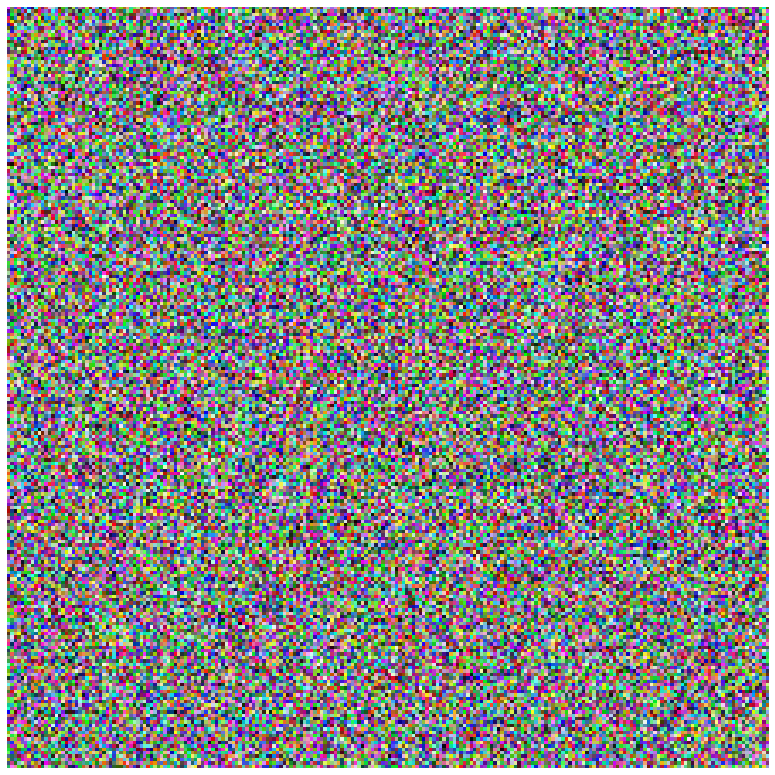

In [3]:
input_image = tf.random.uniform((1, 224, 224, 3), dtype=tf.float32, minval=0, maxval=1)
plt.figure(figsize=(14, 14))
plt.imshow(input_image[0])
plt.axis("off")

In [4]:
patches_images = Patches(16)(input_image)
patches_images.shape

TensorShape([1, 196, 768])

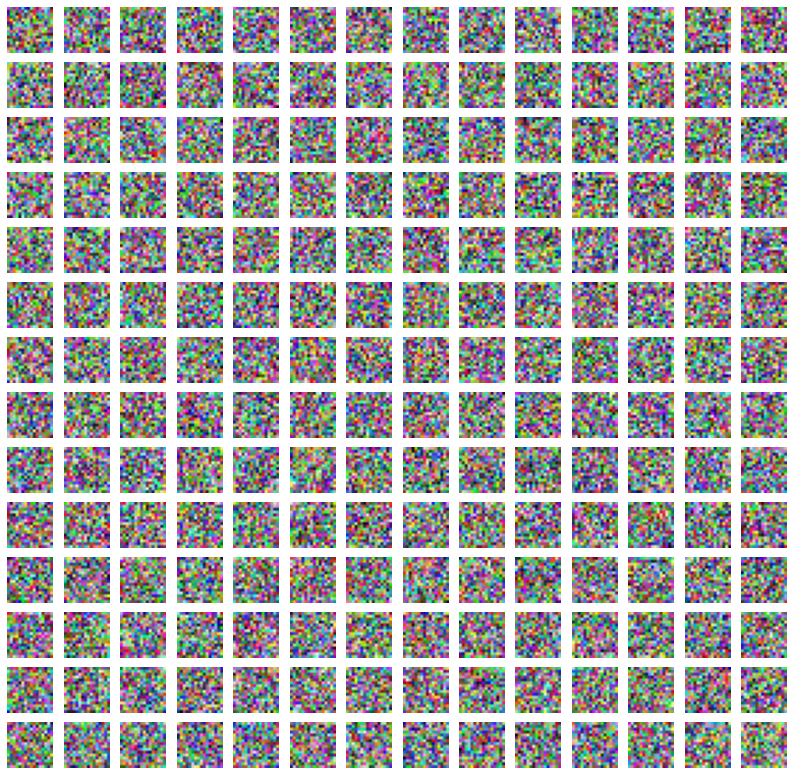

In [5]:
plt.figure(figsize=(14, 14))
for i, patch_image in enumerate(patches_images[0]):
    ax = plt.subplot(14, 14, i + 1)
    patch_img = tf.reshape(patch_image, (16, 16, 3))
    plt.imshow(patch_img)
    plt.axis("off")

In [6]:
asterisk_sequence = tf.random.uniform((1, 1, 768), dtype=tf.float32, minval=0, maxval=1)
patches_images = tf.concat([asterisk_sequence, patches_images], 1)
patches_images.shape

TensorShape([1, 197, 768])

In [7]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units = projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(input_dim = num_patches, output_dim = projection_dim)

    def call(self, patch):
        positions = tf.range(start = 0, limit = self.num_patches, delta = 1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [8]:
encoded_patches = PatchEncoder(197, 768)
input_sequences = encoded_patches(patches_images)
input_sequences.shape

TensorShape([1, 197, 768])